*   Автор решения: Тимур Камалиев
*   e-mail: timurkamaliev@gmail.com

**Задание 1.** Имеется отрезок длины $L$. Написать алгоритм разбиения отрезка на более мелкие, при этом длина разбивающего отрезка должна увеличиваться от одного конца к другому. Считать, что стартовый разбивающий отрезок задан и имеет длину $l$, а каждый последующий увеличивается в $q$ раз ($q>1$). При каких значениях $l$, $q$ возможно точное разбиение для заданного $L$?  Если точное разбиение невозможно, написать алгоритм минимальной коррекции вводимых параметров $l$ и $q$ и обеспечить точное разбиение.

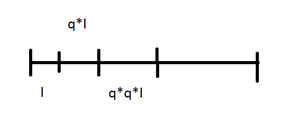

Задачу можно интерпретировать, как преставление числа $L$ в виде суммы первых $n$ членов неубывающей геометрической прогрессии.
Следовательно, точное разбиение отрезка будет возможно только при тех значениях $p$ и $q$, при которых $L$ можно будет с заданной точностью представить в виде суммы $n$ членов геометрической прогрессии:

$$L \approx \frac{l \cdot (1-q^n)}{(1-q)}$$

In [1]:
import numpy as np

In [2]:
EPS = 1e-03     # Заданная точность
LOG = True      # Вывод на печать

In [3]:
L, l, q = map(float, input('Введите исходные L, l, q через пробел: ').split())

Введите исходные L, l, q через пробел: 304526254.2 4231.6 125.3


In [4]:
# Сумма n членов геометрической прогрессии
def get_sum(l, q, n):
    return l * (1 - q ** n) / (1 - q)

In [5]:
# Проверим, возможно ли выполнить точное разбиение
bi = l
s = 0
n = 0
while s + EPS < L:
    s = s + bi
    bi = bi * q
    n = n + 1
    
if (abs(s - L) < EPS):
    print('Точное разбиение возможно.')
else:
    print('Точное разбиение невозможно.')        

Точное разбиение невозможно.


Если точное разбиение выполнить невозможно, то попробуем скорректировать параметры $l$ и $q$ таким образом, чтобы сумма $n$ членов геометрической прогрессии сходилась к величине $L$. Таких пар существует множество и они образуют отдельную линию уровня с искомым значением $L$, поэтому найдем любые $l_{new}$ и $q_{new}$, удовлетворяющих условию, а затем уже минимизируем относительное отклонение этих параметров от заданных величин.



Для поиска нужного значения $L$ воспользуемся реализованной ниже вариацией алгоритма градиентного спуска, предварительно расписав частные производные от искомой функции по параметрам $l$ и $q$:

$$\frac{\partial L}{\partial l} = \frac{\partial \Big( \frac{l \cdot (1-q^n)}{(1-q)} \Big)}{\partial l} = \frac{1-q^n}{1-q},$$

$$\frac{\partial L}{\partial q} = \frac{\partial \Big( \frac{l \cdot (1-q^n)}{(1-q)} \Big)}{\partial q} = \frac{l \cdot ((n-1) \cdot q^{n+1}-n \cdot q^n+q}{q \cdot (q-1)^2}$$

In [6]:
# Частная производная от функции L по l
def dLdl(q, n):
    return (1 - q ** n) / (1 - q)

In [7]:
# Частная производная от функции L по q
def dLdq(l, q, n):
    return l * ((n - 1) * q ** (n + 1) - n * q ** n + q) / (q * (q - 1) ** 2)

In [8]:
step_l = 1 / L  # Величина шага по l
step_q = 1 / L  # Величина шага по q

l_prev = l      # Начальное приближение по l
q_prev = q      # Начальное приближение по q
L_prev = get_sum(l_prev, q_prev, n)
L_new = 0
dLdl_grad = dLdl(l_prev, n)
dLdq_grad = dLdq(l_prev, q_prev, n)
while (True):
    l_new = l_prev - step_l * dLdl_grad
    q_new = q_prev - step_q * dLdq_grad
    L_new = get_sum(l_new, q_new, n)

    if LOG:
        print('l_new = {0:.4f}\tq_new = {1:.4f}\tL_new = {2:.3f}'.format(l_new, q_new, L_new))

    if (L_new < L_prev):
        if abs(L - L_new) <= EPS:
            break
        else:
            if (L_new < L):
                dLdl_grad = dLdl(l_prev, n)
                dLdq_grad = dLdq(l_prev, q_prev, n)
                step_q = step_q / 10
                step_l = step_l / 10
            else:
                l_prev, q_prev, L_prev = l_new, q_new, L_new

l_new = 3982.7190	q_new = 124.6420	L_new = 7774481245.097
l_new = 3733.8380	q_new = 123.9840	L_new = 7174137791.749
l_new = 3484.9570	q_new = 123.3260	L_new = 6590185796.612
l_new = 3236.0760	q_new = 122.6681	L_new = 6022378610.251
l_new = 2987.1950	q_new = 122.0101	L_new = 5470471284.818
l_new = 2738.3141	q_new = 121.3521	L_new = 4934220574.051
l_new = 2489.4331	q_new = 120.6941	L_new = 4413384933.274
l_new = 2240.5521	q_new = 120.0361	L_new = 3907724519.397
l_new = 1991.6711	q_new = 119.3781	L_new = 3417001190.917
l_new = 1742.7901	q_new = 118.7201	L_new = 2940978507.918
l_new = 1493.9091	q_new = 118.0621	L_new = 2479421732.068
l_new = 1245.0281	q_new = 117.4042	L_new = 2032097826.623
l_new = 996.1471	q_new = 116.7462	L_new = 1598775456.426
l_new = 747.2661	q_new = 116.0882	L_new = 1179224987.903
l_new = 498.3851	q_new = 115.4302	L_new = 773218489.070
l_new = 249.5041	q_new = 114.7722	L_new = 380529729.528
l_new = 0.6231	q_new = 114.1142	L_new = 934180.464
l_new = 249.4990	q_new = 11

In [9]:
# Относительное изменение параметра
def calc_dif(new_val, val):
    return abs(new_val - val) / (val + EPS)

In [10]:
l_hat = calc_dif(l_new, l)
q_hat = calc_dif(q_new, q)
print('Относительное изменение по l составило {0:.4f}, по q - {1:.4f}.'.format(l_hat, q_hat))

Относительное изменение по l составило 0.9435, по q - 0.1374.


Теперь минимизируем максимальное относительное отклоненение по параметрам $l$ и $q$:

$$max \bigg( \frac{|l - l_{new}|}{l + \varepsilon}, \frac{|q - q_{new}|}{q + \varepsilon} \bigg) \rightarrow min$$

In [11]:
step = 0.001
if (q_hat - l_hat) > EPS:
    while (q_hat - l_hat) > EPS:
        q_new = q_new + step * q_new
        l_new = L * (1 - q_new) / (1 - q_new ** n)
        l_hat = calc_dif(l_new, l)
        q_hat = calc_dif(q_new, q)
        if LOG:
            print('l_new = {0:.4f}\tq_new = {1:.4f}\tmax(dl, dq) = {2:.3f}'.format(l_new, q_new, max(l_hat, q_hat)))
else:
    while (l_hat - q_hat) > EPS:
        q_new = q_new - step * q_new
        l_new = L * (1 - q_new) / (1 - q_new ** n)
        l_hat = calc_dif(l_new, l)
        q_hat = calc_dif(q_new, q)
        if LOG:
            print('l_new = {0:.4f}\tq_new = {1:.4f}\tmax(dl, dq) = {2:.4f}'.format(l_new, q_new, max(l_hat, q_hat)))

l_new = 239.6958	q_new = 107.9712	max(dl, dq) = 0.9434
l_new = 240.4141	q_new = 107.8632	max(dl, dq) = 0.9432
l_new = 241.1345	q_new = 107.7553	max(dl, dq) = 0.9430
l_new = 241.8571	q_new = 107.6476	max(dl, dq) = 0.9428
l_new = 242.5819	q_new = 107.5399	max(dl, dq) = 0.9427
l_new = 243.3088	q_new = 107.4324	max(dl, dq) = 0.9425
l_new = 244.0379	q_new = 107.3249	max(dl, dq) = 0.9423
l_new = 244.7691	q_new = 107.2176	max(dl, dq) = 0.9422
l_new = 245.5026	q_new = 107.1104	max(dl, dq) = 0.9420
l_new = 246.2383	q_new = 107.0033	max(dl, dq) = 0.9418
l_new = 246.9761	q_new = 106.8963	max(dl, dq) = 0.9416
l_new = 247.7162	q_new = 106.7894	max(dl, dq) = 0.9415
l_new = 248.4585	q_new = 106.6826	max(dl, dq) = 0.9413
l_new = 249.2030	q_new = 106.5759	max(dl, dq) = 0.9411
l_new = 249.9497	q_new = 106.4693	max(dl, dq) = 0.9409
l_new = 250.6987	q_new = 106.3629	max(dl, dq) = 0.9408
l_new = 251.4499	q_new = 106.2565	max(dl, dq) = 0.9406
l_new = 252.2034	q_new = 106.1503	max(dl, dq) = 0.9404
l_new = 25

In [12]:
print('l_answer = {0:.4f}, q_answer = {1:.4f}.'.format(l_new , q_new))

l_answer = 1839.4190, q_answer = 54.5721.
